Question 1: Understanding the Dataset 
<br>
Description: Load a dataset and understand its basic properties including data types dimensions, and first few rows

In [1]:
# Write your code from here
from sklearn.datasets import load_iris 
import pandas as pd
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.dtypes



sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [2]:
df.shape

(150, 5)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Question 2: Checking for Missing Values
<br>
Description: Identify missing values in the dataset.

In [4]:
# Write your code from here

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Question 3: Descriptive Statistics
<br>
Description: Calculate descriptive statistics for numerical columns.

In [8]:
# Write you code from here
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Question 4: Handling Outliers
<br>
Description: Identify outliers in numerical columns using box plots.

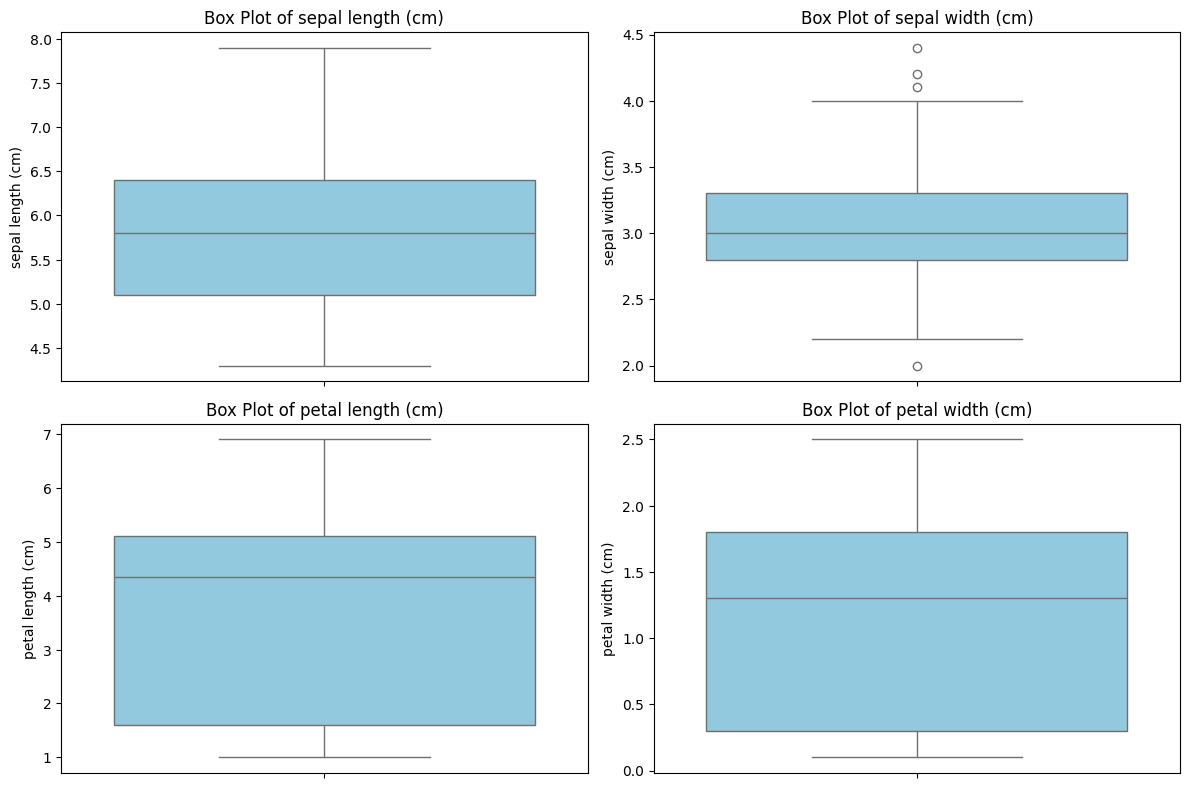

In [10]:
# Write your code from here
# Write your code from here
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Question 5: Categorical Data Analysis
<br>
Description: Explore the counts of categorical variables.

/tmp/ipykernel_1513/4190641414.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


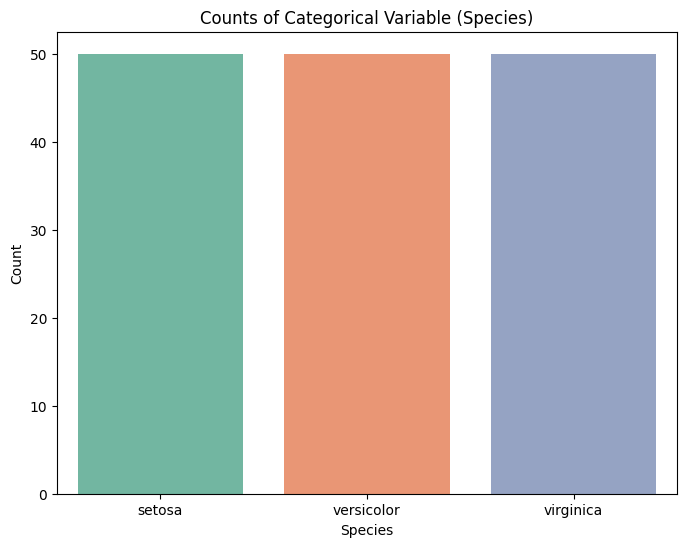

In [11]:
# Write your code from here
# Write your code from here
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the target column
category_counts = df['target'].value_counts()

# Map target values to their corresponding species names
target_names = {i: name for i, name in enumerate(iris.target_names)}
category_counts.index = category_counts.index.map(target_names)

# Plot the counts of each category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Counts of Categorical Variable (Species)')
plt.show()

Question 6: Data Transformation
<br>
Description: Transform a categorical column into numerical using Label Encoding.

In [14]:
# Write your code from here
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])

print(df[['target', 'target_encoded']].head())

   target  target_encoded
0       0               0
1       0               0
2       0               0
3       0               0
4       0               0


Question 7: Visualizing Data Distributions
<br>
Description: Plot histograms for numerical columns to understand distributions.

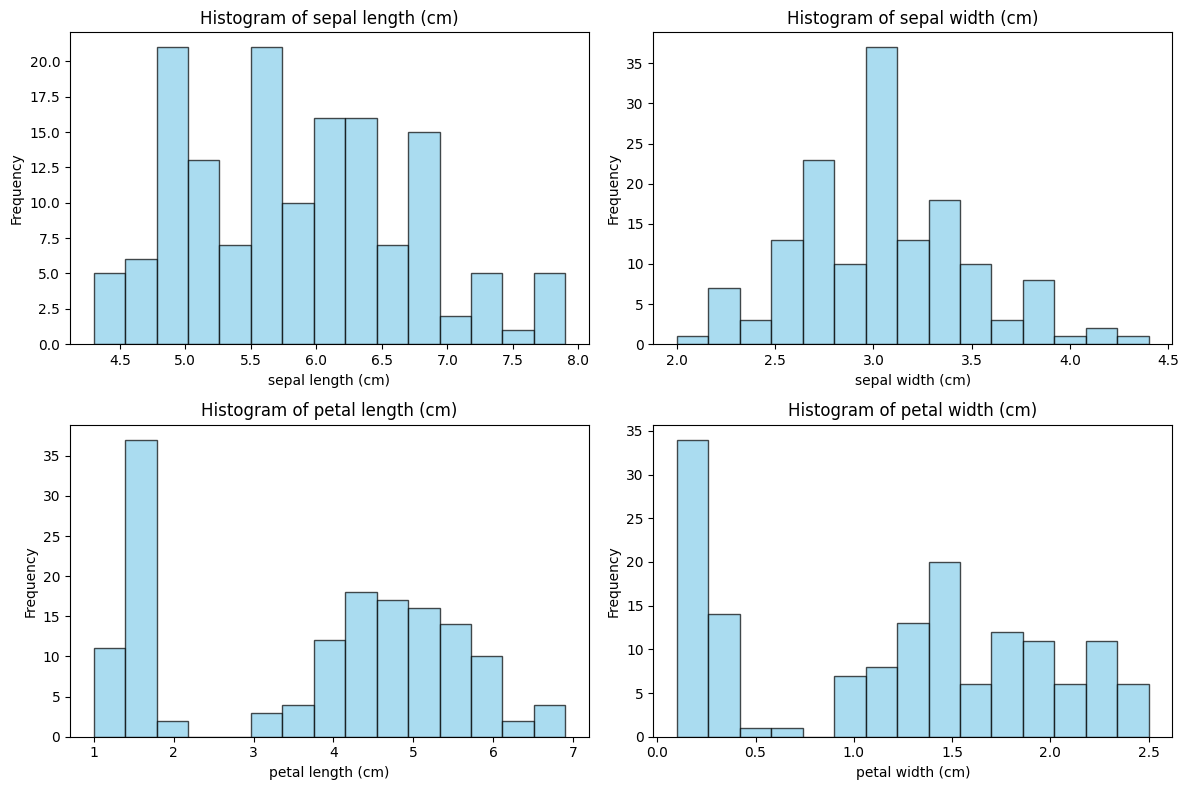

In [16]:
# Write your code from here
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
plt.figure(figsize=(12, 8))

# Select only the numerical columns for plotting histograms
numerical_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for i, column in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[column], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Question 8: Correlation Analysis
<br>
Description: Calculate and visualize the correlation matrix for numerical features.

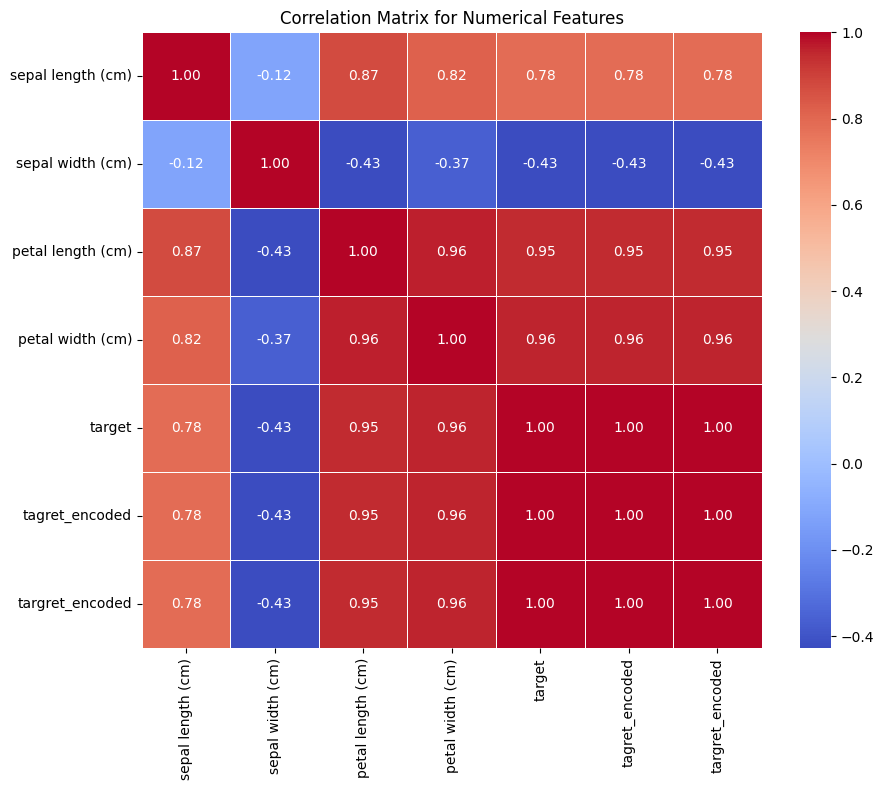

In [17]:
# Write your code from here
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df.iloc[:, :-1].corr()  # Exclude the target column

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

Question 9: Feature Engineering
<br>
Description: Create a new feature by combining or transforming existing features.

In [18]:


# Create a new feature: petal area (petal length * petal width)
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']

# Display the first few rows to verify the new feature
print(df[['petal length (cm)', 'petal width (cm)', 'petal area (cm^2)']].head())

   petal length (cm)  petal width (cm)  petal area (cm^2)
0                1.4               0.2               0.28
1                1.4               0.2               0.28
2                1.3               0.2               0.26
3                1.5               0.2               0.30
4                1.4               0.2               0.28


Question 10: Advanced Outlier Detection
<br>
Description: Use the Z-score method to identify and handle outliers.

In [19]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
numerical_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
z_scores = df[numerical_columns].apply(zscore)

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Print the rows with outliers
print("Rows with outliers:")
print(df[outliers.any(axis=1)])

# Optionally, remove rows with outliers
df_no_outliers = df[~outliers.any(axis=1)]

Rows with outliers:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   

    target  tagret_encoded  targret_encoded  target_encoded  petal area (cm^2)  
15       0               0                0               0                0.6  
